<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\Tung\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# web location:
local_csv = '../data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [4]:
# A:
nh1_data = pd.read_csv(local_csv)
nh1_data.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


### 2. Perform any required data cleaning. Do some EDA.

In [6]:
# A:
nh1_data.shape

(90, 28)

In [8]:
nh1_data.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


In [9]:
nh1_data.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

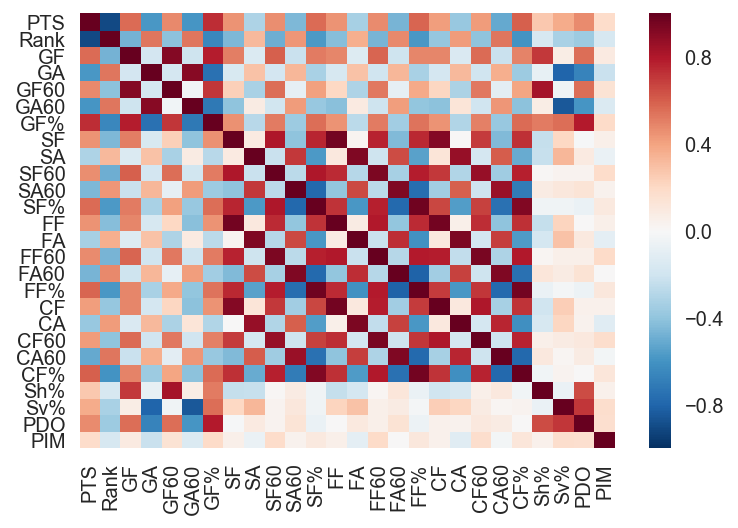

In [11]:
import seaborn as sns
sns.heatmap(nh1_data.corr())

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [19]:
# A:
nh1_data['Rank'].value_counts()
y = nh1_data.Rank

### 4. What is the baseline accuracy?

In [27]:
# A: This is the percentage of each rank
y.value_counts()/y.count()

# e.g., rank 3 accounts for 34.4%

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [30]:
# A:
feature_cols = ['CF%', 'GF', 'Sh%', 'PDO']
X = nh1_data[feature_cols]
X.head()

,CF%,GF,Sh%,PDO
0,52.5,115,10.34,1034
1,53.4,94,8.22,1014
2,51.4,90,8.45,1019
3,57.1,104,8.77,992
4,52.6,86,7.98,1013


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [36]:
# A:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [37]:
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.434782608696


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A: Slighter better....0.434 vs 0.33

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [39]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99,train_size=0.5)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.511111111111


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [40]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99,train_size=0.5)
knn = KNeighborsClassifier(n_neighbors=len(X_train))
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.311111111111


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [47]:
# A:
score_list = []
for k in range(1,len(X_train)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99,train_size=0.5)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred_class = knn.predict(X_test)
    score_list.append(( metrics.accuracy_score(y_test, y_pred_class)))

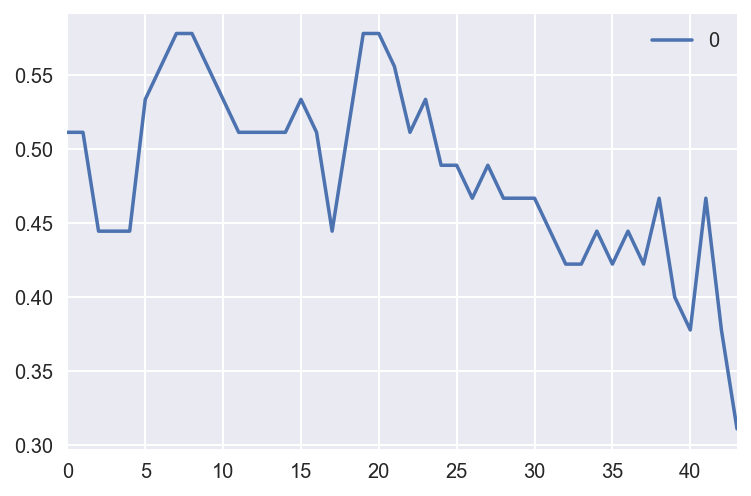

In [51]:

sl = pd.DataFrame(score_list)
sl.plot()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [ ]:
# this is from the solution code
from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

print max_neighbors

# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

In [63]:
# this is easier 
from sklearn.model_selection import cross_val_score
cvs_list = []

for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    cvs = cross_val_score(model, X, y, cv=5)
    mean_score = np.mean(cvs)
    cvs_list.append(mean_score)

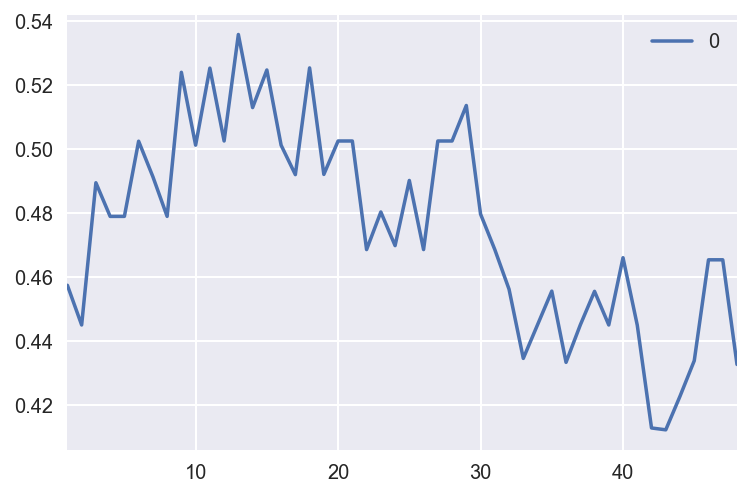

In [85]:
pd.DataFrame(cvs_list)[1:].plot()

In [54]:
# example how to use the cross valdation score
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

def show_cross_validation(X,y,k):
    print '--------------THIS IS THE K-FOLD----------------------\n'
    K = k
    print 'K:', K
    model = KNeighborsClassifier()

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=K)
    print "Cross-validated scores:", scores
    print "Mean CV R2:", np.mean(scores)
    print 'Std CV R2:', np.std(scores)

    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=K)
    #print 'Crodd-validated predictions', predictions
    r2 = metrics.r2_score(y, predictions)
    print "Cross-Predicted R2:", r2

--------------THIS IS THE K-FOLD----------------------

K: 5
Cross-validated scores: [ 0.5         0.7         0.22222222  0.75        0.375     ]
Mean CV R2: 0.509444444444
Std CV R2: 0.197402890644
Cross-Predicted R2: -0.754122938531


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [76]:
# A:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [77]:
from sklearn.model_selection import cross_val_score
cvs_list_s = []

for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    cvs = cross_val_score(model, X_s, y, cv=5)
    mean_score = np.mean(cvs)
    cvs_list_s.append(mean_score)

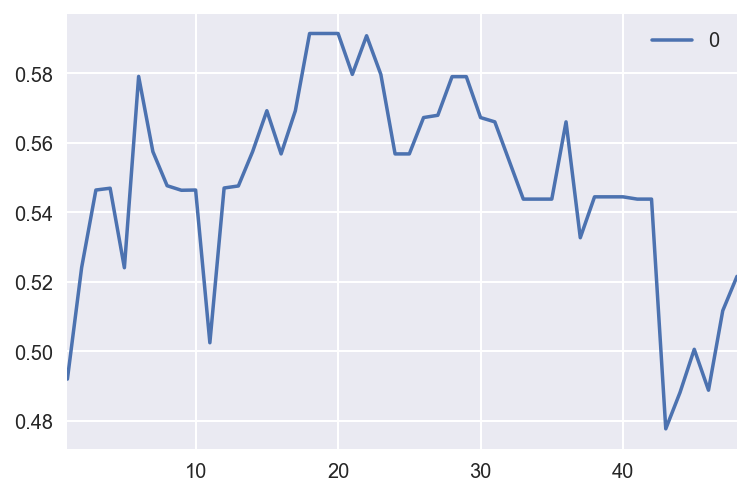

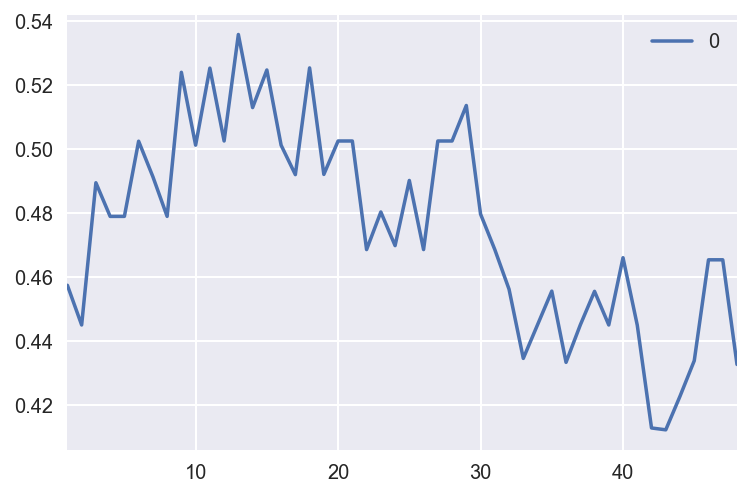

In [84]:
pd.DataFrame(cvs_list_s)[1:].plot()
pd.DataFrame(cvs_list)[1:].plot()

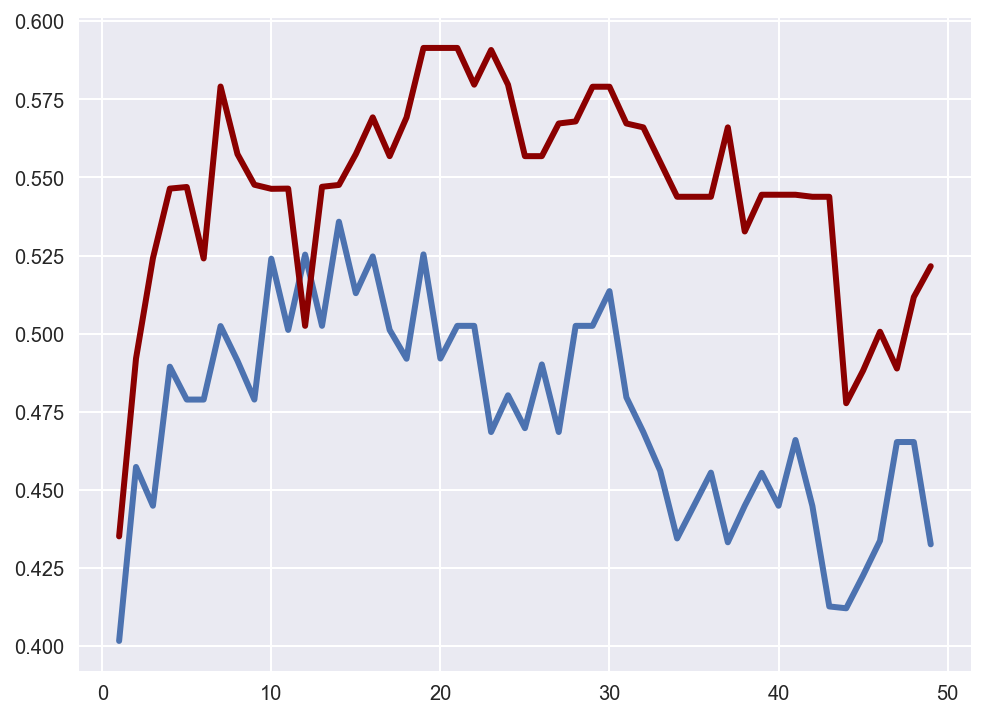

In [82]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, 50), cvs_list, lw=3.)
ax.plot(range(1, 50), cvs_list_s, lw=3., color='darkred')
#plt.show()